### Suppose a college takes a sample of student grades for a data science class

In [1]:
data = [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


#### The data has been loaded into a python data structure, which is good data type for general data manipulation, but not optimized for numeric analysis. For that, we are going to use the NumPy package, which includes specific data types and functions for working with numbers in python

In [2]:
import numpy as np

grades = np.array(data) ## The most basic numpy function
print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


### Let's visualize the difference between numpy arrays and lists

In [3]:
print(type(data), 'x 2:', data * 2)
print('---')
print(type(grades), 'x 2:', grades * 2)

<class 'list'> x 2: [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64, 50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]
---
<class 'numpy.ndarray'> x 2: [100 100  94 194  98   6 106  84  52 148 164 124  74  30 140  54  72  70
  96 104 126 128]


Multiplying a list by 2 creates a new list of twice the length with the original sequence of list elements repeated. Multiplying a NumPy array on the other hand performs an element wise calculation in which the array behaves like a vector, so we end up with an array of same size in which each element has been multiplied by 2.

The key takeaway from this is that NumPy arrays are specifically designed to support mathematical operations on numeric data - which makes them more useful for data analysis than a generic list.

You might have spotted that the class type for the numpy array above is a numpy.ndarray. The nd indicates that this is a structure that can consists of multiple dimensions (it can have n dimensions). Our specific instance has a single dimension of student grades

In [4]:
## Checking the shape of the grades confirm that it has 22 elements of dimension

grades.shape

(22,)

In [5]:
### Applying aggregation across elements in the array. Let's find a simple average 

grades.mean()

49.18181818181818

### Let's add a second set of data for the same students, this time recording the typical number of hours per week they devoted to studying

In [6]:
# Define an array of study hours
study_hours = [10.0, 11.5, 9.0, 16.0, 9.25, 1.0, 11.5, 9.0, 8.5, 14.5, 15.5, 13.75, 9.0, 8.0, 15.5, 8.0, 9.0, 6.0, 10.0, 12.0, 12.5, 12.0]

# Create a 2D array (an array of arrays)
student_data = np.array([study_hours, grades])

# display the array
student_data

array([[10.  , 11.5 ,  9.  , 16.  ,  9.25,  1.  , 11.5 ,  9.  ,  8.5 ,
        14.5 , 15.5 , 13.75,  9.  ,  8.  , 15.5 ,  8.  ,  9.  ,  6.  ,
        10.  , 12.  , 12.5 , 12.  ],
       [50.  , 50.  , 47.  , 97.  , 49.  ,  3.  , 53.  , 42.  , 26.  ,
        74.  , 82.  , 62.  , 37.  , 15.  , 70.  , 27.  , 36.  , 35.  ,
        48.  , 52.  , 63.  , 64.  ]])

In [7]:
## Let's check the shape
student_data.shape

(2, 22)

In [8]:
### Show the first element of the first element
student_data[0][0]

10.0

In [9]:
### Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print("Average study hours: {: .2f}\nAverage grade: {:.2f}".format(avg_study, avg_grade))

Average study hours:  10.52
Average grade: 49.18


### Exploring tabular data with Pandas
While NumPy provides a lot of the functionality you need to work with numbers, and specifically arrays of numeric values; when you start to deal with two-dimensional tables of data, the Pandas package offers a more convinient structure to work with - the DataFrame

In [10]:
import pandas as pd
df_students = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'], 'StudyHours':student_data[0], 'Grade': student_data[1]})

Note that in addition to the columns you specified, the DataFrame includes an index to unique identify each row. We could have specified the index explicitly, and assigned any kind of appropriate value (for example, an email address); but because we didn't specify an index, one has been created with unique integer value for each row

In [11]:
df_students.head(10)

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


### Finding and filtering data in a DataFrame

In [12]:
## Let's use loc method to retrieve data for a specific index value

# Get the data for index value no. 5
df_students.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

In [13]:
## Let's use loc to get the rows with index values from 0 to 5
df_students.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In [14]:
## Let's use iloc method to find rows based on ordinal position in the DataFrame (regardless of the index)
df_students.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


The loc method returned rows with index label in the list of values from 0 to 5 - which includes 0,1,2,3,4,5 (six rows). However, the iloc method returns the rows in the positions included in the range 0 to 5, and since integer ranges don't include the upper-bound value, this includes position 0, 1, 2, 3, and 4 (five rows).

In [15]:
df_students.iloc[0, [1,2]]

StudyHours    10.0
Grade         50.0
Name: 0, dtype: object

In [16]:
df_students.loc[0, 'Grade']

50.0

In [17]:
## Let's return a row using nested function - DataFrame Filtering expression
df_students[df_students['Name'] == 'Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [18]:
## Alternative to DataFrame Filtering expression is DataFrame Query Method
df_students.query('Name == "Aisha"')

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


In [19]:
### Another lternative to same thing
df_students[df_students.Name =='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


## Loading a DataFrame from a file

In [20]:
import urllib.request
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
filename = 'grades.csv'
urllib.request.urlretrieve(url, filename)

('grades.csv', <http.client.HTTPMessage at 0x20d416311f0>)

In [21]:
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [22]:
### Handling missing values
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [23]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [24]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [25]:
### Missing value treatment
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


Alternatively, it might be important to ensure that you only use data you know to be absolutely correct; so you can drop rows or columns that contain null values by using the dropna method. In this case, we'll remove rows (axis 0 of the dataframe) where any of the columns contain null values

In [26]:
df_students = df_students.dropna(axis = 0, how = 'any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [27]:
## Explore data in the dataframe

# Get the mean study hours using column name as an index
mean_study = df_students['StudyHours'].mean()

# Get the mean grade using column name as a property
mean_grade = df_students.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))


Average weekly study hours: 10.52
Average grade: 49.18


### Applying filtering to find only the students who studied for more than the average amount of time


In [28]:
# Get students who studied for more than mean value
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


 We can see that the filtered result is itself a dataframe, so you can work with its columns just like any other DataFrame
 
For example, let's find the average grade for students who undertook more than the average amount of study time

In [29]:
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the dataframe, indicating whether or not each student passed.

First, we'll create a Pandas Series containing the pass/fail indicator (True or False), and then we will concatenate that series as a new column (axis 1) in the dataframe

In [30]:
passes = pd.Series(df_students['Grade'] >=60) ## This will return binary value of true or false

df_students = pd.concat([df_students, passes.rename("Pass")], axis = 1) #axis of 1 signifies that the concatenation is happening across the column

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [31]:
## Let's count the students who passed and failed the exam
print(df_students.groupby(df_students.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


In [32]:
## Grouping the pass and fail students on the basis of study hours and grade
print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


<ipython-input-32-0b1b6cbd876b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours', 'Grade'].mean())


In [33]:
## Sorting students based on Scores (Grades achieved)

df_students = df_students.sort_values('Grade', ascending = False)
df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


### Visualizing data using Matplotlib

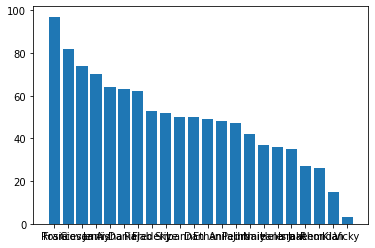

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt

# create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

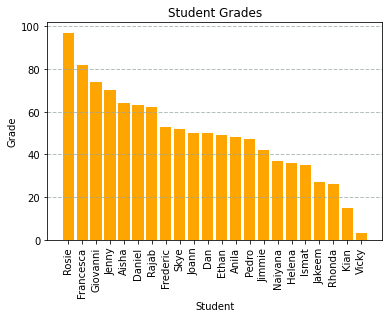

In [35]:
### We can make the chart more appealing and clear to understand

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color = '#95a5a6', linestyle = '--', linewidth = 1, axis = 'y', alpha = 0.7)
plt.xticks(rotation = 90)

# Display the plot
plt.show()

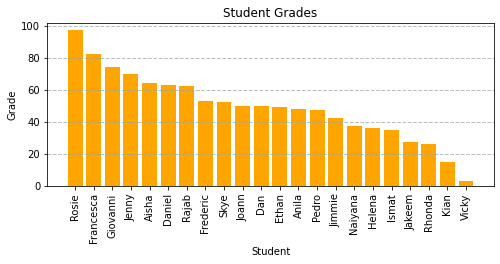

In [36]:
### Creating the figure with specified dimensions

# Create a figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color = '#95a5a6', linestyle = '--', linewidth = 1, axis = 'y', alpha = 0.7)
plt.xticks(rotation = 90)

# Display the plot
plt.show()

<ipython-input-37-65b037496246>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
<ipython-input-37-65b037496246>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


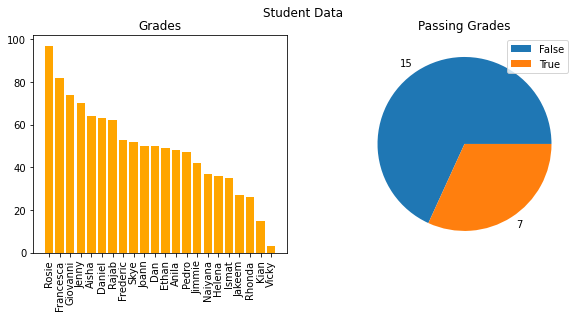

In [37]:
# A figure can contain multiple subplots, each on its own axis
# Let's create a figure with two subplots - one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

<AxesSubplot:xlabel='Name'>

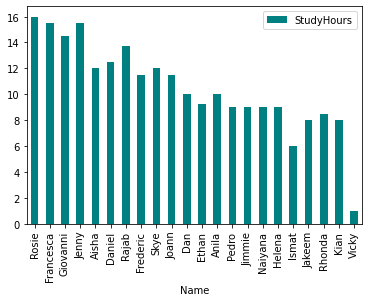

In [38]:
# Till now, we have use matplotlib.pyplot to plot charts but matplotlib is so foundational to graphics in python that many packages including pandas provide methods that abstract the underlying matplotlib functions and simplify plotting
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))


## Descriptive statistics and data distribution

When examining a variable (for example a sample of student grades), data scientists are particularly interested in its distribution (in other words, how are all different grade values spread across the sample). The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs


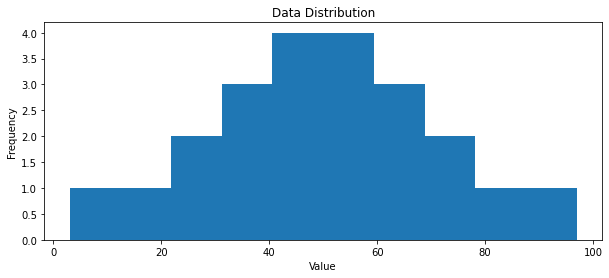

In [39]:
# Get the variable to examine
var_data = df_students['Grade']

# Create a figure
fig = plt.figure(figsize=(10,4))

# plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()



The histogram for grades is a symmetric shape, where the most frequently occuring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.


### Measures of Central Tendency


To understand the distribution better, we can examine so called measures of central tendency, which is a fancy way of describing statistics that represent the "middle" of the data. The goal of this is to try to find a typical value. Common ways to define the middle of the data includes: mean, median and mode

Let's calculate these values, along with the minimum and maximum values for comparison, and show them on the histogram

<b><i>Note:</i></b> - In some sample sets, there may be a tie for the most common value - in which case, the dataset is described as bimodal or even multimodal.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



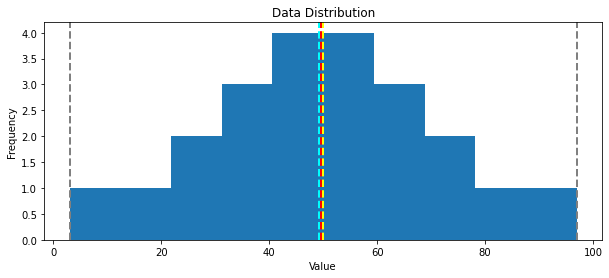

In [40]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, max_val))


# Create a figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth=2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth=2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth=2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()



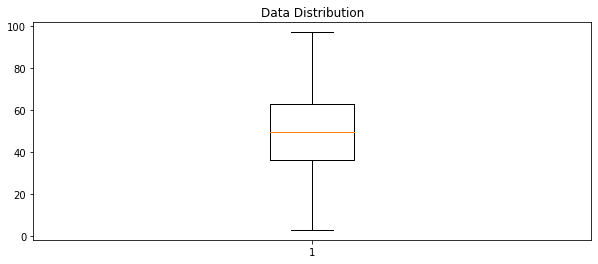

In [41]:
### Now let's visualize the data distribution using boxplots

# Get the variable to examine
var = df_students['Grade']

# Create a figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
plt.show()

For learning, it can be useful to combine histograms and box plots, with the boxplot's orientation changed to align it with histogram (in some way, it can be useful to think of the histogram as the front elevation view of the distribution and the boxplot as a plan view of the distribution from above)

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



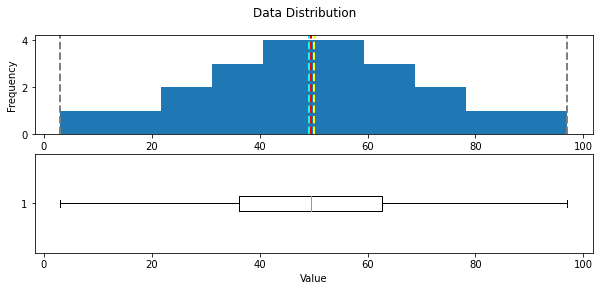

In [44]:
# Create a function that we can re-use
def show_distribution(var_data):
    
    # Get Statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))
    
    # Create a figure for 2 subplots (2 rows and 1 column)
    fig, ax = plt.subplots(2,1, figsize = (10,4))
    
    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)
    
    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the figure
    fig.suptitle('Data Distribution')
    
    # Show the figure
    plt.show()
    
# Get the variable to examine
col = df_students['Grade']

# Call the function
show_distribution(col)
    

All of the measures of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand the statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.


This means, samples refer to the data we have on hand - such as information about these 22 students' study habits and grades. The population refers to all possible data we could collect - such as every student's grades and study habits across every educational institution throughout the history of time. Usually we are interested in the population but it's simply not practical to collect all of the data. Instead, we need to try estimate what the population is like from the small amount of data (samples) that we have.
If we have enough samples, we can calculate something called a Probability density function, which estimates the distribution of grades for the full population.

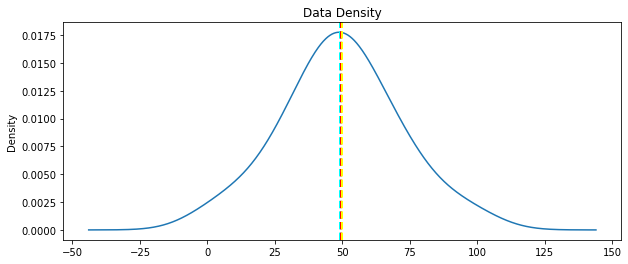

In [45]:
def show_density(var_data):
    
    fig = plt.figure(figsize=(10,4))
    
    # plot density
    var_data.plot.density()
    
    # Add titles and labels
    plt.title('Data Density')
    
    # Show the mean, median and mode
    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)
    
    # show the figure
    plt.show()
    
# Get the density of Grade
col = df_students['Grade']
show_density(col)


Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



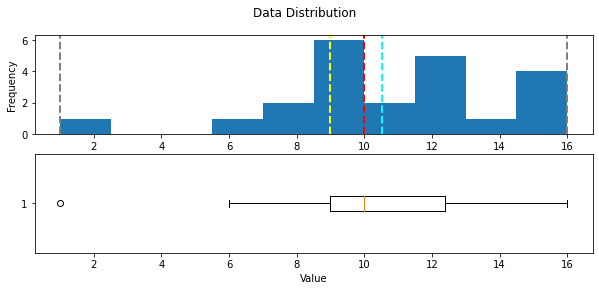

In [46]:
## Let's look are the distribution of the study hours data

# Get the variable to examine
col = df_students['StudyHours']

# Call the distribution
show_distribution(col)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



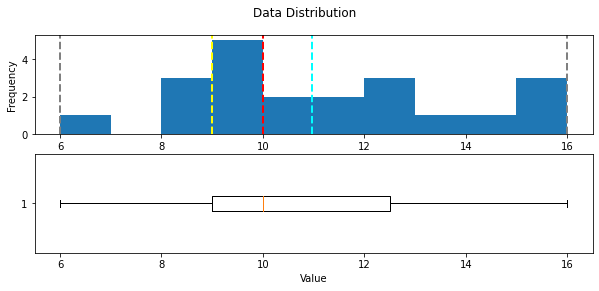

In [47]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

For learning purposes, we have just treated the value of 1 as true outlier and excluded it. In real world though, it would be unusual to exclude data at the extremes without more justification when our sample size is so small. This is because the smaller our sample size, the more likely it is that our sampling is a bad representation of the whole population (here, the population means grades for all students, not just 22). For example, if we sampled study time for another 1000 students, we might find that it's actually quite common to not study much !
When we have more data available, our sample becomes more reliable. This makes it easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas percentile function to exclude observations below the 0.01th percentile (the value above which 99% of the data resides)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



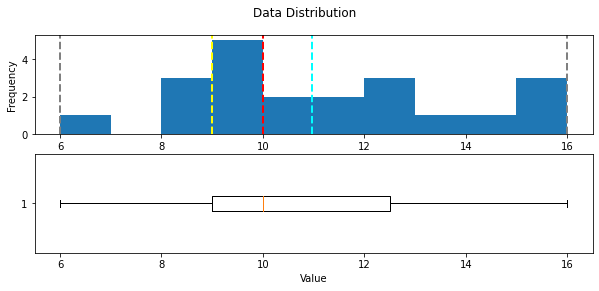

In [49]:
# Calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)

# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']

# Call the distribution
show_distribution(col)

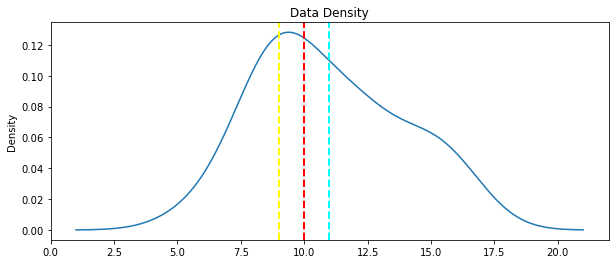

In [50]:
show_density(col)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

## Measures of Variance

So now we have a good idea where the middle of the grade and study hours data distributions are. However, there's another aspect of the distributions we should examine. How much variability is there in the data ?

In [51]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))
    


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


Of these statistics, the standard deviation is generally more useful. It provides a measure in the variance in the data on the same scale as the data itself(so grade points for the Grade distribution and hours for the StudyHours distribution). The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.
When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight.

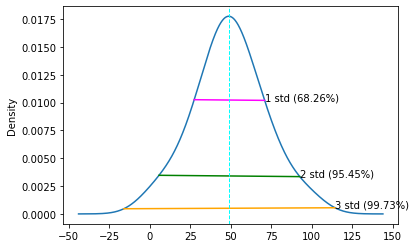

In [54]:
import scipy.stats as stats

# Get the Grade Column
col = df_students['Grade']

# Get the density
density = stats.gaussian_kde(col)

# plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color = 'orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)


plt.show()







The horizontal lines show the percentage of data within 1,2, and 3 standard deviations of the mean (plus or minus).
In any normal distribution:
- 1. Approximately 68.26% of values fall within one standard deviation from the mean
- 2. Approximately 95.45% of values fall within two standard deviation from the mean
- 3. Approximately 99.73% of values fall within three standard deviation from the mean

In [55]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Now that you know something about statistical distribution of the data in your dataset, we are ready to examine your data to identify any apparent relationships between variables.
First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We have identified that the studyhours column contains some outliers with extremely low values, so we will remove these rows.

In [56]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


## Comparing numerical and categorical variables

The data includes two numeric variables (StudyHours and Grade) and two categorical variables (Name and Pass). Let's start comparing the numeric StudyHours column to the categorical Pass Column to see if there is an apparent relationship between the number of hours studied and a passing grade.
To make this comparison, let's create boxplots showing the distributions of StudyHours for each possible pass value (true or false)

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

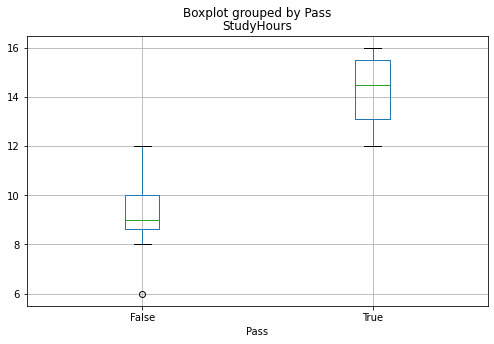

In [57]:
df_sample.boxplot(column = 'StudyHours', by ='Pass', figsize=(8,5))


<AxesSubplot:xlabel='Name'>

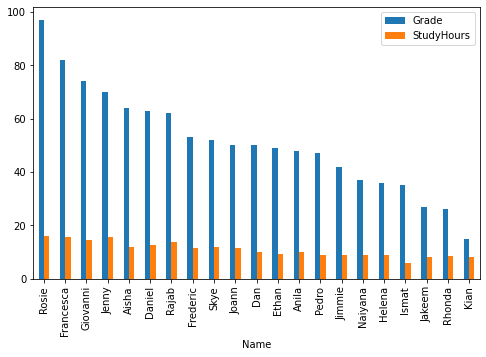

In [58]:
### Comparing numeric variables
# Create a barplot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. Grades are measured in Grade points an range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.
A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution, but are measured on the same scale. To accomplish this, we will use a technique called MinMax Scaling that distributes the values proportionally on the scale of 0 to 1.

<AxesSubplot:xlabel='Name'>

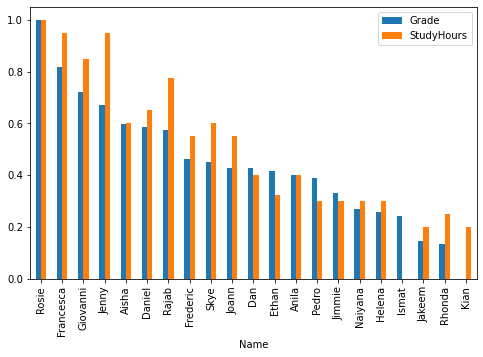

In [59]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))




In [60]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789675

### Another way to visualize apparent correlation between two numeric columns is to use a scatter plot

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

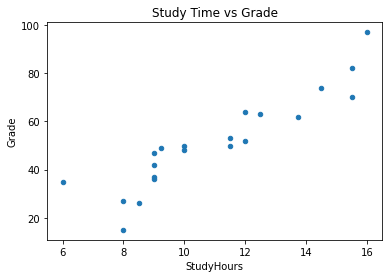

In [61]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

We don't have to code the regression calculation itself - The scipy package includes a stats class that provide a linregress method to do the hard work. This returns the coefficients you need for the slop equation (slope (m) and the intercept(b) based on a given pair of variable samples you want to compare)

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


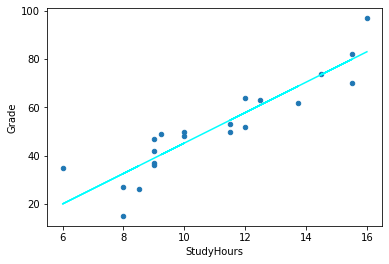

In [62]:
from scipy import stats

# Make a copy of the df_sample (numeric cols)
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs Salary
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [63]:
# show the original x, y values, the f(x) value and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
3,16.00,97.0,83.098400,-13.901600
10,15.50,82.0,79.941687,-2.058313
9,14.50,74.0,73.628262,-0.371738
14,15.50,70.0,79.941687,9.941687
21,12.00,64.0,57.844698,-6.155302
20,12.50,63.0,61.001410,-1.998590
11,13.75,62.0,68.893193,6.893193
6,11.50,53.0,54.687985,1.687985
19,12.00,52.0,57.844698,5.844698
1,11.50,50.0,54.687985,4.687985


### Using regression coefficients for prediction

In [67]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m * x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0, min(100,prediction))

# Print the estimated grade
print('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))


Studying for 14 hours per week may result in a grade of 70
